In [19]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
import yfinance as yf
import datetime as dt
from datetime import date , timedelta

import plotly.graph_objects as go
import plotly.express as px

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller


In [49]:
end_date = date.today().strftime("%Y-%m-%d")
start_date = (date.today() -timedelta(days=365)).strftime("%Y-%m-%d")
print("Start Date:",start_date," End Date:",end_date)

Start Date: 2023-12-11  End Date: 2024-12-10


In [56]:
ticker = "GOOGL"

df = yf.download(ticker,start=start_date,end=end_date)
df

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,GOOGL,GOOGL,GOOGL,GOOGL,GOOGL,GOOGL
Date,,,,,,
2023-12-11,132.808563,133.289993,133.339996,131.360001,132.380005,31138000
2023-12-12,132.041336,132.520004,133.000000,131.259995,131.809998,29032800
2023-12-13,132.091171,132.570007,133.500000,131.570007,133.380005,30104800
2023-12-14,131.463440,131.940002,133.720001,129.690002,133.380005,38722400
2023-12-15,132.121048,132.600006,133.509995,131.179993,131.619995,50815200
...,...,...,...,...,...,...
2024-12-03,171.143845,171.339996,172.679993,170.850006,171.490005,22248700
2024-12-04,174.170380,174.369995,174.910004,171.059998,171.149994,31615100


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2023-12-11 to 2024-12-09
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   (Adj Close, GOOGL)  251 non-null    float64
 1   (Close, GOOGL)      251 non-null    float64
 2   (High, GOOGL)       251 non-null    float64
 3   (Low, GOOGL)        251 non-null    float64
 4   (Open, GOOGL)       251 non-null    float64
 5   (Volume, GOOGL)     251 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.7 KB


In [40]:
df.insert(0,"Date", df.index,True)
df.reset_index(drop=True,inplace=True)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   (Date, )            251 non-null    datetime64[ns]
 1   (Adj Close, GOOGL)  251 non-null    float64       
 2   (Close, GOOGL)      251 non-null    float64       
 3   (High, GOOGL)       251 non-null    float64       
 4   (Low, GOOGL)        251 non-null    float64       
 5   (Open, GOOGL)       251 non-null    float64       
 6   (Volume, GOOGL)     251 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 13.9 KB


In [42]:
df.head(10)

Price,Date,Adj Close,Close,High,Low,Open,Volume
Ticker,,GOOGL,GOOGL,GOOGL,GOOGL,GOOGL,GOOGL
0,2023-12-11,132.808563,133.289993,133.339996,131.360001,132.380005,31138000
1,2023-12-12,132.041336,132.520004,133.000000,131.259995,131.809998,29032800
2,2023-12-13,132.091171,132.570007,133.500000,131.570007,133.380005,30104800
3,2023-12-14,131.463440,131.940002,133.720001,129.690002,133.380005,38722400
4,2023-12-15,132.121048,132.600006,133.509995,131.179993,131.619995,50815200
5,2023-12-18,135.309494,135.800003,137.149994,132.429993,132.630005,32258000
6,2023-12-19,136.156403,136.649994,137.470001,136.080002,136.839996,25476800
7,2023-12-20,137.840317,138.339996,141.699997,138.070007,138.970001,49107200
8,2023-12-21,139.912796,140.419998,140.690002,139.179993,139.490005,27488300


In [43]:
df_close = df[['Date','Close']]
df_close.head()

Price,Date,Close
Ticker,,GOOGL
0,2023-12-11,133.289993
1,2023-12-12,132.520004
2,2023-12-13,132.570007
3,2023-12-14,131.940002
4,2023-12-15,132.600006


In [44]:
df.isnull().sum()

Price      Ticker
Date                 0
Adj Close  GOOGL     0
Close      GOOGL     0
High       GOOGL     0
Low        GOOGL     0
Open       GOOGL     0
Volume     GOOGL     0
dtype: int64

In [45]:
df.duplicated().sum()

np.int64(0)

In [46]:
df_close.shape

(251, 2)

In [47]:
df_close.set_index('Date',inplace=True)
df_close.head()

Price,Close
Ticker,GOOGL
Date,
2023-12-11,133.289993
2023-12-12,132.520004
2023-12-13,132.570007
2023-12-14,131.940002
2023-12-15,132.600006


In [48]:
df_close.describe()

Price,Close
Ticker,GOOGL
count,251.000000
mean,160.616295
std,14.820256
min,131.399994
25%,148.169998
50%,162.929993
75%,172.300003
max,191.179993


<Axes: xlabel='Date'>

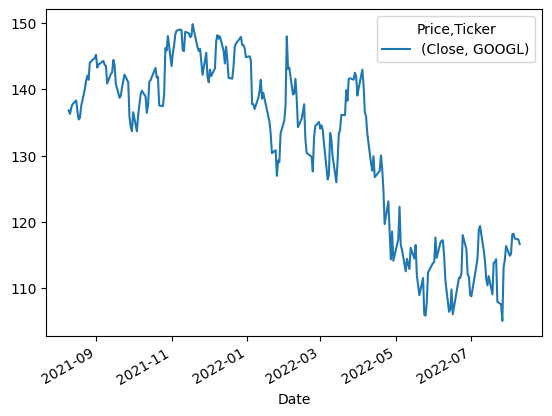

In [18]:
df_close.plot()

In [21]:
test_result=adfuller(df_close['Close'])
test_result

(np.float64(-1.4098682042434985),
 np.float64(0.5775361404504732),
 0,
 251,
 {'1%': np.float64(-3.4566744514553016),
  '5%': np.float64(-2.8731248767783426),
  '10%': np.float64(-2.5729436702592023)},
 np.float64(1134.6054685897561))

In [ ]:
def adfuller_test(close):
    result=adfuller(close)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
    

In [24]:
adfuller_test(df_close['Close'])

ADF Test Statistic : -1.4098682042434985
p-value : 0.5775361404504732
#Lags Used : 0
Number of Observations Used : 251
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [31]:
df_close['first differencing'] = df_close['Close'] - df_close['Close'].shift(1)
df_close.head(20)

C:\Users\Prerana Walvekar\AppData\Local\Temp\ipykernel_9200\986634268.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_close['first differencing'] = df_close['Close'] - df_close['Close'].shift(1)


Price,Close,first differencing
Ticker,GOOGL,
Date,,
2021-08-10,136.807007,NaN
2021-08-11,136.279007,NaN
2021-08-12,137.194000,NaN
2021-08-13,137.727493,NaN
2021-08-16,138.309494,NaN
2021-08-17,136.661499,NaN
2021-08-18,135.449005,NaN
2021-08-19,135.679993,NaN


In [35]:
df_close['Seasonal Difference'] = df_close['Close'] - df_close['Close'].shift(12)
df_close

C:\Users\Prerana Walvekar\AppData\Local\Temp\ipykernel_9200\4107265062.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_close['Seasonal Difference'] = df_close['Close'] - df_close['Close'].shift(12)


Price,Close,first differencing,Seasonal Difference
Ticker,GOOGL,,
Date,,,
2021-08-10,136.807007,NaN,NaN
2021-08-11,136.279007,NaN,NaN
2021-08-12,137.194000,NaN,NaN
2021-08-13,137.727493,NaN,NaN
2021-08-16,138.309494,NaN,NaN
...,...,...,...
2022-08-03,118.080002,NaN,NaN
2022-08-04,118.190002,NaN,NaN
